In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, ParameterGrid, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix
#from pyearth import Earth
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [146]:
data = pd.read_csv('us_used_cars_final.csv')
data.head()

vin back_legroom        body_type          city  \
0  5LMCJ2C97HUL71203      36.8 in  SUV / Crossover        Devine   
1  1FM5K8D87HGE07214      39.5 in  SUV / Crossover       Buffalo   
2  1FMCU0GX6FUA14602      36.8 in  SUV / Crossover  Murfreesboro   
3  WBA4W7C56JAB87837      33.7 in            Coupe    San Rafael   
4  SADCL2GX4KA397815      37.2 in  SUV / Crossover     Glen Cove   

   city_fuel_economy  daysonmarket  dealer_zip  \
0               21.0            40       78016   
1               16.0             9       55313   
2               23.0            30       37129   
3               21.0            45       94901   
4               22.0           319       11542   

                                         description engine_cylinders  \
0  *We have 19 sources of financing and second ch...               I4   
1  We are open for business.    Purchase your nex...               V6   
2  CARFAX One-Owner.THIS VEHICLE HAS GONE THROUGH...               I4   
3  FUEL EFFICIENT 32 MPG Hwy/21 MPG City! CARFAX ...               I6   
4  Santorini Black 2019 Jaguar F-PACE 30t R-Sport...               I4   

   engine_displacement  ...                 torque transmission  \
0               2000.0  ...  270 lb-ft @ 3,000 RPM            A   
1               3500.0  ...  255 lb-ft @ 4,000 RPM            A   
2               2500.0  ...  170 lb-ft @ 4,500 RPM            A   
3               3000.0  ...  330 lb-ft @ 1,380 RPM            A   
4               2000.0  ...  295 lb-ft @ 1,500 RPM            A   

   transmission_display  trimId        trim_name wheel_system  \
0             Automatic  t66989       Select FWD          FWD   
1     6-Speed Automatic  t67141          XLT AWD          AWD   
2             Automatic  t55391           SE FWD          FWD   
3     8-Speed Automatic  t73244   440i Coupe RWD          RWD   
4     8-Speed Automatic  t83299  30t R-Sport AWD          AWD   

  wheel_system_display wheelbase    width  year  
0    Front-Wheel Drive  105.9 in  84.1 in  2017  
1      All-Wheel Drive  112.8 in  90.2 in  2017  
2    Front-Wheel Drive  105.9 in  81.8 in  2015  
3     Rear-Wheel Drive  110.6 in  79.4 in  2018  
4      All-Wheel Drive  113.1 in  85.6 in  2019  

[5 rows x 57 columns]

In [147]:
data.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'main_picture_url', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

EDA & Data Viz (completed by hiba)

In [3]:
# data types for all columns 
data_types = pd.DataFrame(data.dtypes)
data_types[0].value_counts()

object     33
float64    11
bool        8
int64       5
Name: 0, dtype: int64

In [4]:
data.describe()

city_fuel_economy  daysonmarket    dealer_zip  engine_displacement  \
count        6000.000000   6000.000000   6000.000000          6000.000000   
mean           21.064333     45.114333  50305.630833          2959.166667   
std             4.568115     68.868636  26739.061772          1133.912224   
min            11.000000      0.000000   1020.000000          1000.000000   
25%            17.000000     13.000000  30076.000000          2000.000000   
50%            21.000000     27.000000  48197.000000          2500.000000   
75%            25.000000     51.000000  75237.000000          3600.000000   
max            70.000000   1365.000000  99362.000000          6600.000000   

       highway_fuel_economy   horsepower     latitude    listing_id  \
count           6000.000000  6000.000000  6000.000000  6.000000e+03   
mean              28.460667   249.092167    37.240227  2.779022e+08   
std                5.460869    82.798315     4.977101  5.683748e+06   
min               15.000000    78.000000    25.481300  1.622947e+08   
25%               24.000000   180.000000    33.606625  2.772000e+08   
50%               28.000000   248.000000    38.410100  2.792906e+08   
75%               32.000000   295.000000    41.101500  2.806469e+08   
max               75.000000   707.000000    48.304300  2.819634e+08   

         longitude        mileage  owner_count          price  savings_amount  \
count  6000.000000    6000.000000  6000.000000    6000.000000     6000.000000   
mean    -90.394026   45099.504500     1.317667   24568.383500     1066.323500   
std      13.470080   35797.272393     0.646135   16744.392283     1045.426374   
min    -123.197000      10.000000     1.000000    1680.000000        0.000000   
25%     -96.763100   22090.750000     1.000000   16500.000000      327.000000   
50%     -87.470300   34645.000000     1.000000   21924.000000      781.000000   
75%     -80.826500   56661.250000     1.000000   29995.000000     1499.250000   
max     -68.411600  294140.000000     8.000000  859000.000000    12039.000000   

       seller_rating          sp_id         year  
count    6000.000000    6000.000000  6000.000000  
mean        4.268644  209583.667000  2016.812667  
std         0.500819  130166.298871     2.653943  
min         1.000000   41593.000000  1993.000000  
25%         4.030303   60592.000000  2016.000000  
50%         4.347826  276221.000000  2017.000000  
75%         4.600000  307550.000000  2019.000000  
max         5.000000  440352.000000  2020.000000

#### drop columns that are a unique ID
1. vin: Type String. Vehicle Identification Number is a unique encoded string for every vehicle. 
2. listing_id: Unique Type Integer. Listing id from the website
3. main_picture_url: Type String.

In [5]:
data.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'main_picture_url', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [6]:
data.drop(columns = ['vin', 'listing_id', 'main_picture_url', 'description'], inplace = True)

In [7]:
data.drop(columns = ['franchise_dealer'], inplace = True)
# franchise dealer is all True; has no variance; removed bc its a constant feature. 

### Feature engineering
(completed by hiba)

In [8]:
# map 
print(data.wheel_system.unique())
print(data.transmission.unique())

['FWD' 'AWD' 'RWD' '4WD' '4X2']
['A' 'CVT' 'M' 'Dual Clutch']


In [9]:
bool_cols = data.dtypes[data.dtypes == bool]

In [10]:
bool_cols = pd.DataFrame(bool_cols).reset_index()
bool_cols = bool_cols['index']
bool_cols = list(bool_cols)
bool_cols

['fleet',
 'frame_damaged',
 'has_accidents',
 'isCab',
 'is_new',
 'salvage',
 'theft_title']

In [11]:
for col in bool_cols:
    data[col] = data[col].map({False: 0, True: 1})

In [12]:
cols_map = []
for c in data.columns:
    col_len = (len(data[c].unique()))
    if col_len <=5:
        cols_map.append(c)
[cols_map.remove(c) for c in bool_cols]

[None, None, None, None, None, None, None]

In [13]:
cols_map

['fuel_type', 'transmission', 'wheel_system', 'wheel_system_display']

In [14]:
# # use label encoder
le = LabelEncoder()

encoder_dict = {key: None for key in cols_map}
for c in cols_map:
    encoder_dict[c] = data[c].unique()
    col_name = str(c)+"_cat"
    data[col_name] = le.fit_transform(data[c])
    encoder_dict[col_name] = le.fit_transform(encoder_dict[c])

### Use the encoder dictionary to create dummy data of the selected columns in the dataframe
(completed by hiba)

In [15]:
encoder_dict

{'fuel_type': array(['Gasoline', 'Diesel', 'Flex Fuel Vehicle', 'Biodiesel', 'Hybrid'],
       dtype=object),
 'transmission': array(['A', 'CVT', 'M', 'Dual Clutch'], dtype=object),
 'wheel_system': array(['FWD', 'AWD', 'RWD', '4WD', '4X2'], dtype=object),
 'wheel_system_display': array(['Front-Wheel Drive', 'All-Wheel Drive', 'Rear-Wheel Drive',
        'Four-Wheel Drive', '4X2'], dtype=object),
 'fuel_type_cat': array([3, 1, 2, 0, 4]),
 'transmission_cat': array([0, 1, 3, 2]),
 'wheel_system_cat': array([3, 2, 4, 0, 1]),
 'wheel_system_display_cat': array([3, 1, 4, 2, 0])}

In [16]:
# back_legroom, wheelbase, width, front_legroom,, height,  length, maximum_seating, fuel_tank_volume,
# power, torque

data['back_legroom'] = data['back_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))

In [17]:
data['front_legroom'] = data['front_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['width'] = data['width'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['height'] = data['height'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['length'] = data['length'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['wheelbase'] = data['wheelbase'].map(lambda x: x.lstrip('+-').rstrip('in'))

In [18]:
data['maximum_seating'] = data['maximum_seating'].map(lambda x: x.lstrip('+-').rstrip('seating'))

In [19]:
data['fuel_tank_volume'] = data['fuel_tank_volume'].map(lambda x: x.lstrip('+-').rstrip('gal'))

In [20]:
# power and torque
data['power'] = data['power'].str[:3]
data['torque'] = data['torque'].str[:3]

In [21]:
data.power = pd.to_numeric(data.power)
data.back_legroom = pd.to_numeric(data.back_legroom)
data.front_legroom = pd.to_numeric(data.front_legroom)
data.width = pd.to_numeric(data.width)
data.height = pd.to_numeric(data.height)
data.length = pd.to_numeric(data.length)
data.wheelbase = pd.to_numeric(data.wheelbase)
data.maximum_seating = pd.to_numeric(data.maximum_seating)
data.fuel_tank_volume = pd.to_numeric(data.fuel_tank_volume)
data.torque = pd.to_numeric(data.torque)

In [22]:
corr_table = pd.DataFrame(data.corrwith(data.price)).sort_values(by = 0, ascending = False).reset_index()

In [23]:
highest_corr_numerical = list(corr_table.loc[(corr_table[0] >=  0.2) | (corr_table[0] <= -0.2)]['index'])[1:]
highest_corr_numerical

['horsepower',
 'power',
 'torque',
 'engine_displacement',
 'fuel_tank_volume',
 'wheelbase',
 'year',
 'length',
 'width',
 'savings_amount',
 'height',
 'wheel_system_cat',
 'city_fuel_economy',
 'mileage',
 'highway_fuel_economy']

### Data Viz 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


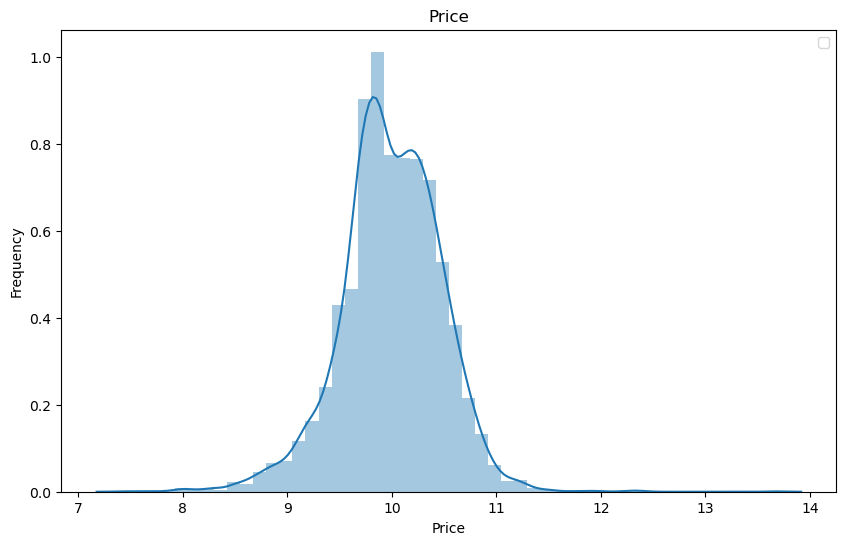

In [96]:
### this graph is from Kaggle; I didn't write the code for it.
viz = data.copy()
viz['price'] = np.log(viz['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(viz['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### Variance w independent variable (only applicable to numerical data) (completed by Hiba)
Use VarianceTreshold from sklearn to remove constant and quasi constant numerical predictors from the dataset

In [25]:
X_numerical = data.copy()
for col in X_numerical.columns:
    if col not in highest_corr_numerical:
        X_numerical.drop(col, axis = 1, inplace = True)

y = data.price

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size = 0.25, random_state = 45)

In [26]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_numerical)
constant_predictors = [x for x in X_numerical.columns if x not in X_numerical.columns[sel.get_support()]]
print(len(constant_predictors), "total constant predictors, with a variance of 0")

0 total constant predictors, with a variance of 0


#### There are 0 constant predictors :(

In [27]:
X_numerical.columns

Index(['city_fuel_economy', 'engine_displacement', 'fuel_tank_volume',
       'height', 'highway_fuel_economy', 'horsepower', 'length', 'mileage',
       'power', 'savings_amount', 'torque', 'wheelbase', 'width', 'year',
       'wheel_system_cat'],
      dtype='object')

### Data Viz (only numerical predictors) (completed by hiba)

<BarContainer object of 6000 artists>

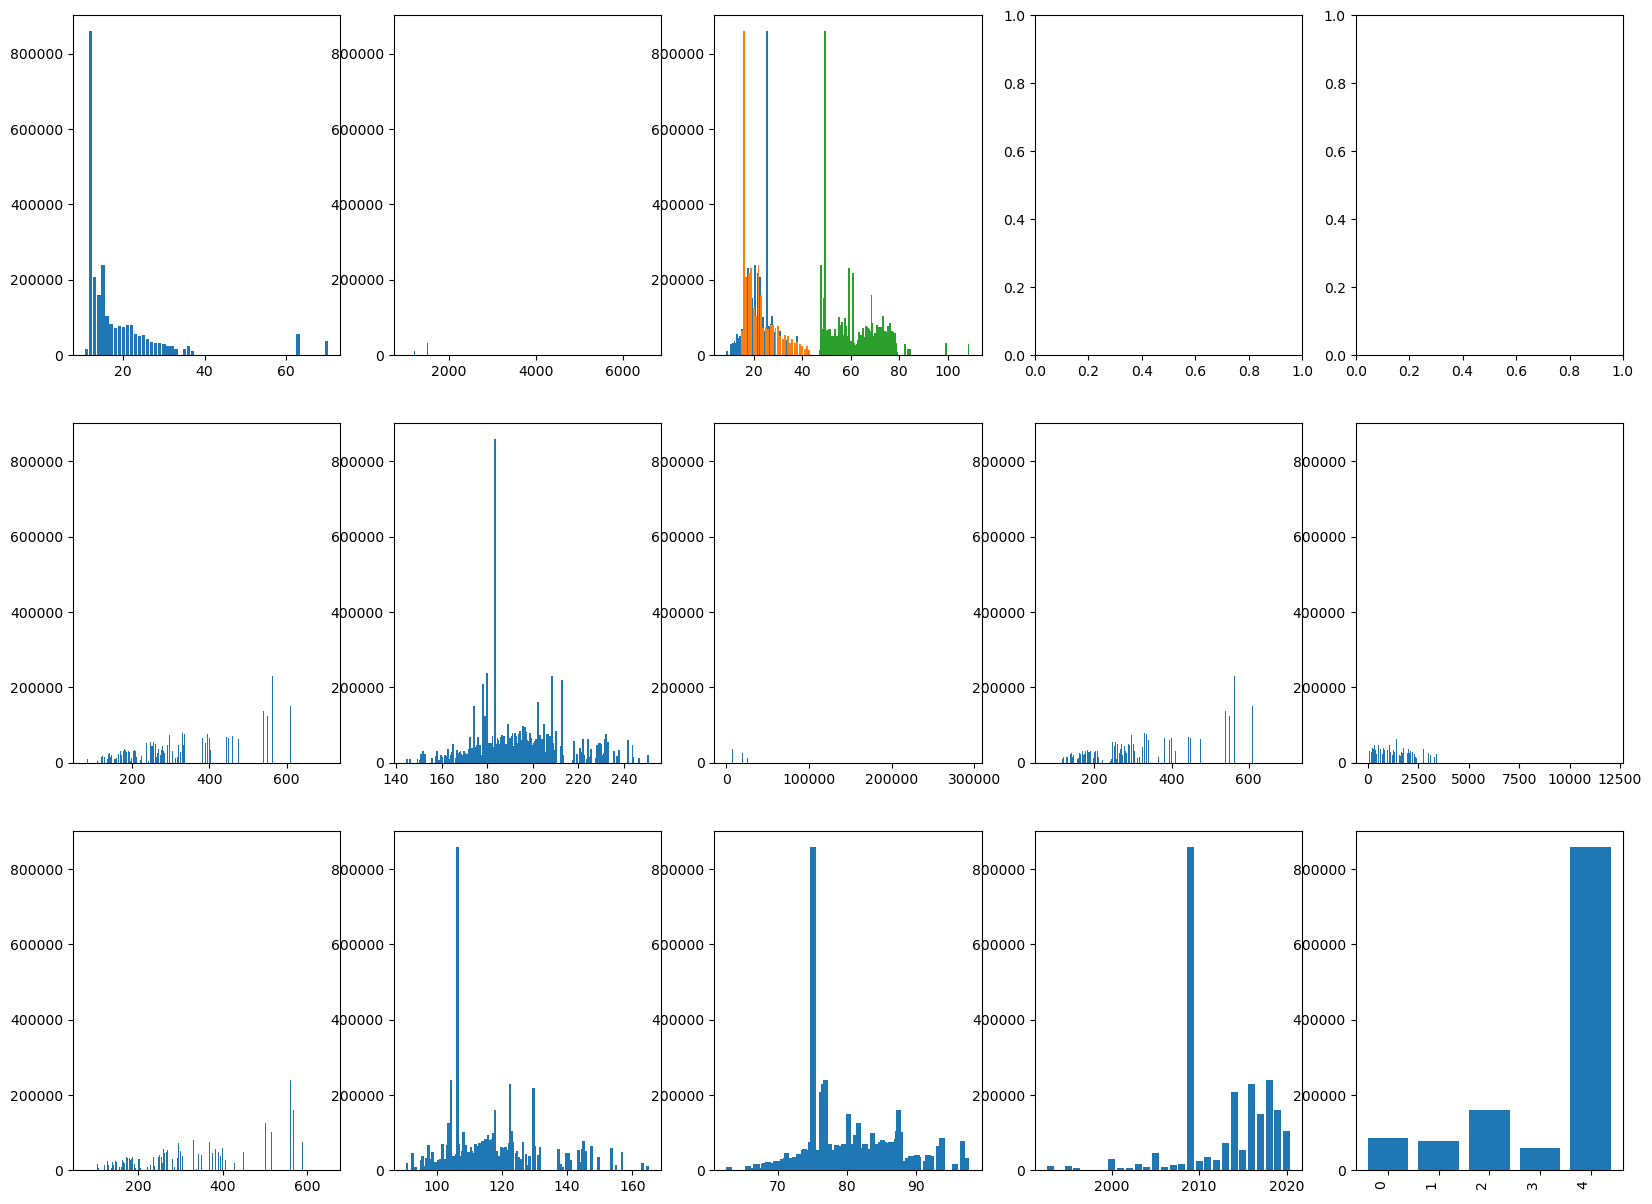

In [28]:
fig, axes = plt.subplots(3,5,figsize=(20,15))

plt.xticks(rotation=90, ha='right')
axes[0][0].bar(X_numerical.city_fuel_economy, y)
plt.xticks(rotation=90, ha='right')
axes[0][1].bar(X_numerical.engine_displacement, y)
axes[0][2].bar(X_numerical.fuel_tank_volume, y)
axes[0][2].bar(X_numerical.highway_fuel_economy, y)
axes[0][2].bar(X_numerical.height, y)

axes[1][0].bar(X_numerical.horsepower, y)
axes[1][1].bar(X_numerical.length, y)
axes[1][2].bar(X_numerical.mileage, y)
axes[1][3].bar(X_numerical.power, y)
axes[1][4].bar(X_numerical.savings_amount, y)

axes[2][0].bar(X_numerical.torque, y)
axes[2][1].bar(X_numerical.wheelbase, y)
axes[2][2].bar(X_numerical.width, y)
axes[2][3].bar(X_numerical.year, y)
axes[2][4].bar(X_numerical.wheel_system_cat, y)

In [29]:
data.columns

Index(['back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type', 'exterior_color', 'fleet', 'frame_damaged',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'highway_fuel_economy', 'horsepower',
       'interior_color', 'isCab', 'is_new', 'latitude', 'length',
       'listed_date', 'listing_color', 'longitude', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year', 'fuel_type_cat',
       'transmission_cat', 'wheel_system_cat', 'wheel_system_display_cat'],
      dtype='object')

### Data Viz (only categorical predictors) (completed by emily)

# fuel_type, transmission, wheel system, wheel_system_display

In [30]:
data_2 = data.copy()
# make seperate df to just look at categorical
o_data = data.drop(columns = ["back_legroom", "wheel_system_display", "wheelbase", "width", "front_legroom", 
                              "fuel_tank_volume", "height", "torque", "maximum_seating","transmission_cat",
                              "power","city_fuel_economy","daysonmarket","dealer_zip","transmission","wheel_system_display_cat",
                              "fuel_type_cat","wheel_system","wheel_system_cat","fuel_type",
                              "engine_displacement","fleet","frame_damaged","has_accidents","highway_fuel_economy",
                              "horsepower","isCab","is_new","latitude","longitude","mileage","owner_count","salvage",
                              "savings_amount","seller_rating","sp_id","theft_title","year"], axis = 1)
# taken out: "franchise_dealer"
cols = o_data.columns
name = []
unique_value = []
for i in range(0,len(cols)):
    c = cols[i]
    unique = len(data[c].unique())
    unique_value.append(unique)
    name.append(c)

In [31]:
# Create the pandas DataFrame with object columns and their unique values
data_ = {'column': name, 'unique_values':unique_value}
o_unique_values_count = pd.DataFrame(data_)
o_unique_values_count.sort_values(by=['unique_values'])

column  unique_values
0              body_type              9
9          listing_color             14
2       engine_cylinders             20
3            engine_type             20
15  transmission_display             21
5         franchise_make             40
11             make_name             42
8            listed_date            321
12            model_name            361
7                 length            384
6         interior_color            696
4         exterior_color           1140
17             trim_name           1159
1                   city           1769
10         major_options           2790
16                trimId           3087
13                 price           3531
14               sp_name           4304

From this information, we can simply visualize with boxplot any variables until make_name, to see their relevance and adjust them. After that we will look more thoroughly, maybe group data. Consider dropping anything with other 1000 unique values as we only have 6000 rows, so might not be good predictors, but will decide on case by case basis.

#### body_type

[]

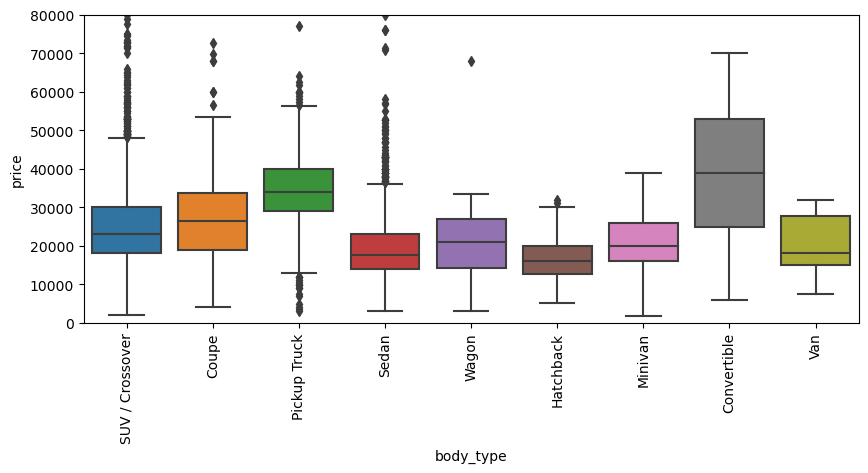

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(x="body_type",y="price", data = data)
plt.xticks(rotation=90)
plt.ylim(0,80000)

plt.plot()

Do seem to have a significant trend right away, check value counts to see if some types are more common than others

In [33]:
data.body_type.value_counts()

SUV / Crossover    3041
Sedan              1655
Pickup Truck        642
Minivan             206
Coupe               146
Wagon               124
Hatchback           110
Convertible          63
Van                  13
Name: body_type, dtype: int64

Have enough observations for each value to be valid, none of the smaller groups stand out substantially, convertible is a little bit spread but that should be fine -> convert to dummies

In [34]:
# change spelling so colummns will be callable
data_2['body_type'] = o_data['body_type'].apply(lambda x: 'SUV_Crossover' if x == 'SUV / Crossover' else 
                                                          'Pickup_Truck' if x == 'Pickup Truck' else
                                                x)
# get dummies
data_2 = pd.get_dummies(data_2, columns=['body_type'], drop_first=True)

#### listing_color

[]

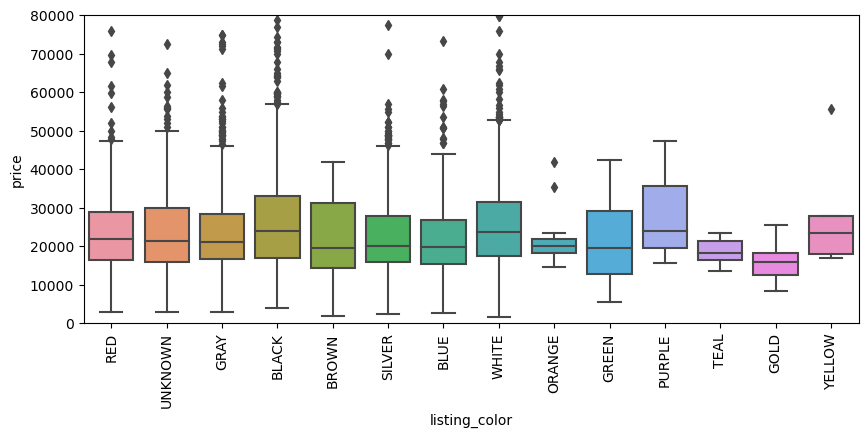

In [35]:
# boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x="listing_color",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

In [36]:
o_data.listing_color.value_counts()

WHITE      1252
BLACK      1209
SILVER      865
GRAY        808
UNKNOWN     746
RED         509
BLUE        484
GREEN        40
BROWN        35
ORANGE       21
TEAL         11
GOLD          8
PURPLE        7
YELLOW        5
Name: listing_color, dtype: int64

Very little variance in colour mean is basically constant range varies a bit but I would consider disregarding this variable.
Especially the few that stand out a little (like gold or teal) have the lowest value counts, and therefore say a lot less.

-> drop column

In [37]:
data_2 = data_2.drop(columns=["listing_color"], axis = 1)

#### engine_cyliners

[]

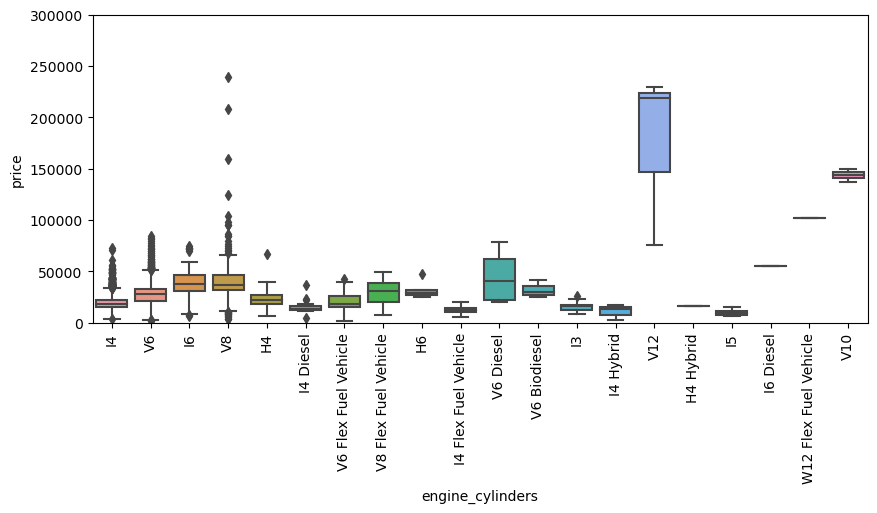

In [103]:
plt.figure(figsize=(10,4))

sns.boxplot(x="engine_cylinders",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,300000)
plt.plot()

In [39]:
o_data.engine_cylinders.value_counts()

I4                       2985
V6                       1905
V8                        527
V6 Flex Fuel Vehicle      183
H4                        161
V8 Flex Fuel Vehicle       96
I6                         56
I4 Flex Fuel Vehicle       22
I4 Diesel                  17
I3                         13
V6 Diesel                   8
H6                          7
V6 Biodiesel                5
I5                          4
I4 Hybrid                   3
V12                         3
V10                         2
H4 Hybrid                   1
I6 Diesel                   1
W12 Flex Fuel Vehicle       1
Name: engine_cylinders, dtype: int64

Turn anything under 100 observations into 'other', if there is only one observation this is not useful data.

In [40]:
data_2['engine_cylinders'] = o_data['engine_cylinders'].apply(lambda x: 'I4' if x == 'I4' else 
                                                          'V6' if x == 'V6' else
                                                          'V8' if x == 'V8' else
                                                          'V6_Flex_Fuel_Vehicle' if x == 'V6 Flex Fuel Vehicle' else
                                                          'H4' if x == 'H4' else
                                                          'other')
data_2.engine_cylinders.value_counts()

I4                      2985
V6                      1905
V8                       527
other                    239
V6_Flex_Fuel_Vehicle     183
H4                       161
Name: engine_cylinders, dtype: int64

[]

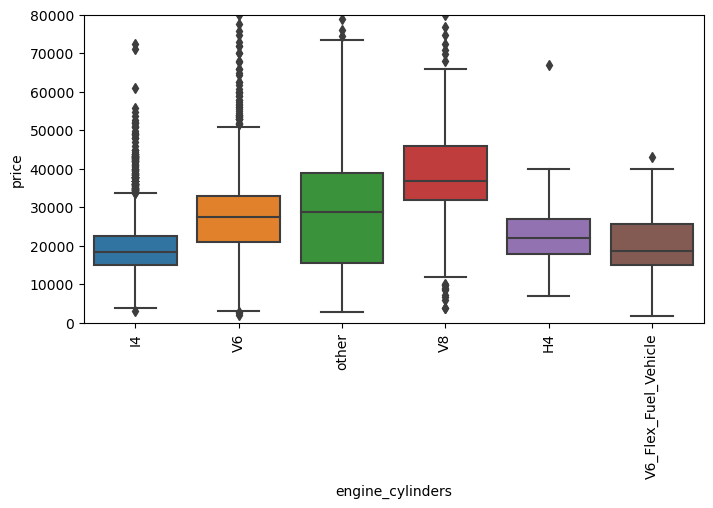

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(x="engine_cylinders",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Other is naturally with bigger range, but this looks better, get dummies for it:

In [42]:
data_2 = pd.get_dummies(data_2, columns=['engine_cylinders'], drop_first=True)

#### engine_type

[]

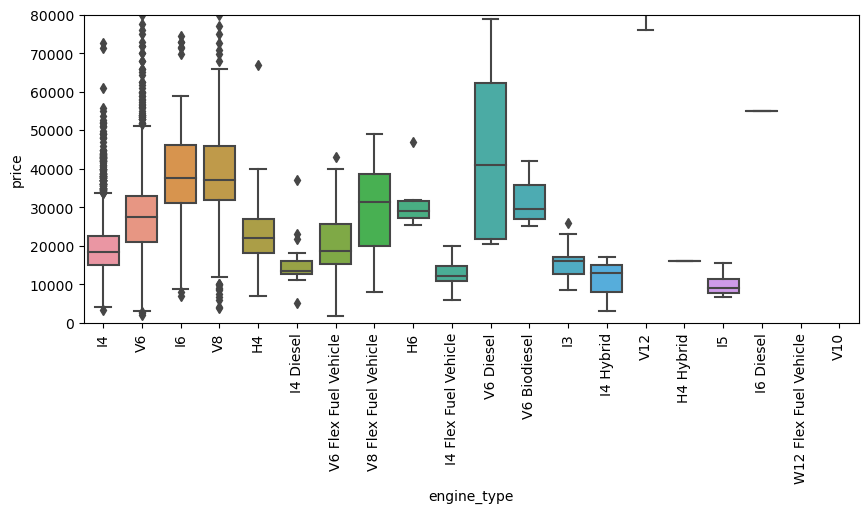

In [98]:
plt.figure(figsize=(10,4))
sns.boxplot(x="engine_type",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Exactly the same distributions and values as in engine_cylinders, can be dropped.

In [44]:
data_2 = data_2.drop(columns=["engine_type"], axis = 1)

#### transmission_display

[]

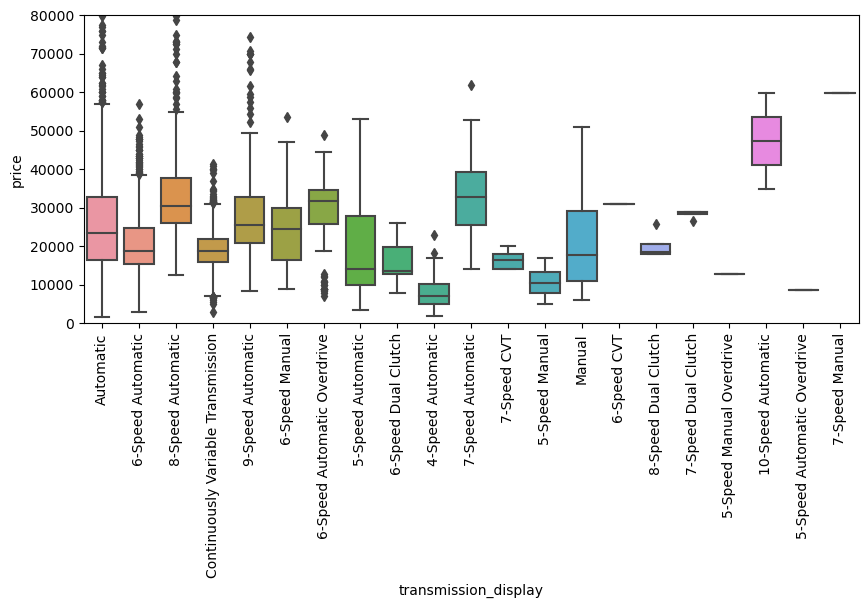

In [45]:
plt.figure(figsize=(10,4))
sns.boxplot(x="transmission_display",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Mean and range seem both to be varying, might be valuable column to predict price, check value counts:

In [46]:
data.transmission_display.value_counts().head()

Automatic                             2277
6-Speed Automatic                     1303
Continuously Variable Transmission     965
8-Speed Automatic                      679
9-Speed Automatic                      284
Name: transmission_display, dtype: int64

Convert anything with under 100 observations into other:

[]

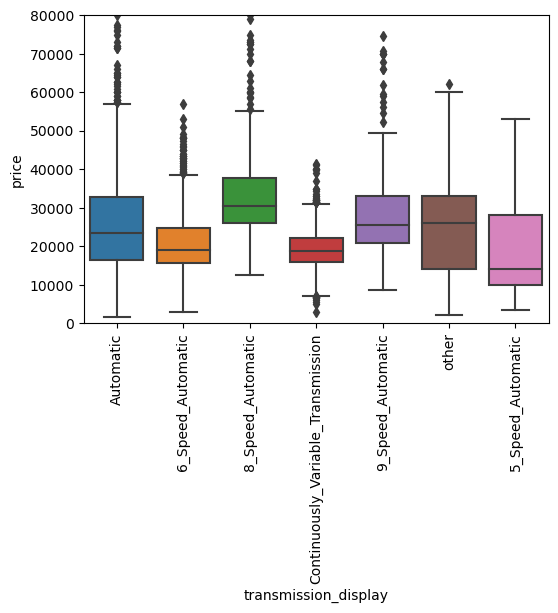

In [47]:
data_2['transmission_display'] = o_data['transmission_display'].apply(lambda x: 'Automatic' if x == 'Automatic' else 
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          'Continuously_Variable_Transmission' if x == 'Continuously Variable Transmission' else
                                                          '8_Speed_Automatic' if x == '8-Speed Automatic' else
                                                          '9_Speed_Automatic' if x == '9-Speed Automatic' else
                                                          '6_Speed_Automatic' if x == '6-Speed Automatic' else
                                                          '5_Speed_Automatic' if x == '5-Speed Automatic' else
                                                          'other')
plt.figure(figsize=(6,4))
sns.boxplot(x="transmission_display",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

Looks relevant, change in mean and besides 2 relatively small range -> convert into dummies

In [48]:
# turn those columns into dummies
data_2 = pd.get_dummies(data_2, columns=['transmission_display'], drop_first=True)

#### franchise_make

[]

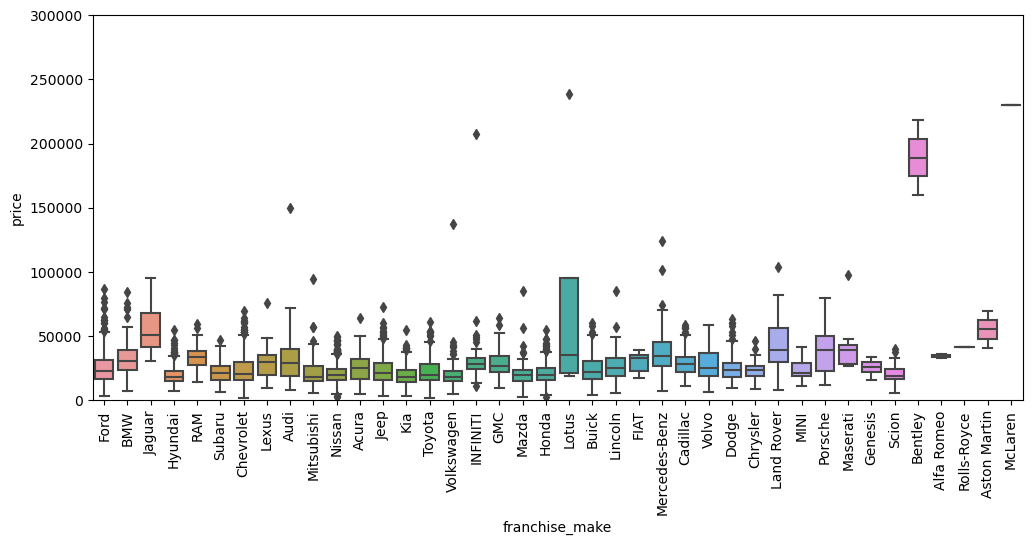

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(x="franchise_make",y="price", data = o_data)
plt.xticks(rotation=90)
plt.ylim(0,300000)
plt.plot()

This seems to be too many columns to just turn into dummies, and as brand is strongly connected to price this seems an important column to keep -> divide brands into groups depending on their mean price, and label encode these groups.

In [50]:
# look at mean price by group
brand_mean_price=data.groupby('franchise_make', as_index=False)['price'].mean()
brand_mean_price=brand_mean_price.sort_values(by=['price'])
brand_mean_price.head()

franchise_make         price
20            Kia  20001.936275
16        Hyundai  20064.829268
27          Mazda  20135.692857
38     Volkswagen  20160.651007
35          Scion  20897.826087

In [51]:
# sort the brands into groups with similar means
group_0 = brand_mean_price.iloc[0:8,0]
group_1 = brand_mean_price.iloc[8:14,0]
group_2 = brand_mean_price.iloc[14:19,0]
group_3 = brand_mean_price.iloc[19:25,0]
group_4 = brand_mean_price.iloc[25:34,0]
group_5 = brand_mean_price.iloc[34:38,0]
group_6 = brand_mean_price.iloc[38:40,0]

# write function to get names
def get_names (group):
    final = []
    for i in range(0,len(group)):
        name = group.iloc[i]
        final.append(name)
    return(final)
# list of names in each group
names_0 = get_names(group_0)
names_1 = get_names(group_1)
names_2 = get_names(group_2)
names_3 = get_names(group_3)
names_4 = get_names(group_4)
names_5 = get_names(group_5)
names_6 = get_names(group_6)

# replace each object with a number of their group
data_2['franchise_make'] = o_data['franchise_make'].apply(lambda x: 0 if x in names_0 else
                                                          1 if x in names_1 else
                                                          2 if x in names_2 else
                                                          3 if x in names_3 else
                                                          4 if x in names_4 else
                                                          5 if x in names_5 else
                                                          6 if x in names_6 else
                                                         'wrong')

#### make_name

In [134]:
data.make_name.value_counts()

Ford             824
Chevrolet        575
Toyota           523
Nissan           489
Honda            475
Jeep             396
Dodge            252
GMC              238
Hyundai          236
Kia              217
BMW              167
Subaru           167
Mercedes-Benz    140
Mazda            137
Volkswagen       134
RAM              120
Cadillac         113
Chrysler         111
Lexus             94
Lincoln           84
Buick             83
INFINITI          76
Acura             75
Audi              67
Land Rover        35
Volvo             34
Mitsubishi        32
MINI              26
Jaguar            25
Alfa Romeo        13
Porsche           10
Genesis            9
Maserati           5
Scion              4
Bentley            3
Pontiac            2
Rolls-Royce        2
Mercury            2
Ferrari            2
Saturn             1
FIAT               1
Plymouth           1
Name: make_name, dtype: int64

Has the same information as franchise_make, can be dropped.

In [53]:
data_2 = data_2.drop(columns=["make_name"], axis = 1)

#### listed_date

In [54]:
data.listed_date.value_counts().head()

2020-09-02    207
2020-08-28    157
2020-09-03    153
2020-08-26    145
2020-08-27    144
Name: listed_date, dtype: int64

In [55]:
#simply turn into numerical
import datetime
data_2['listed_date']=pd.to_datetime(data_2["listed_date"]).dt.strftime("%Y%m%d")
data_2['listed_date']=data_2.listed_date.astype(int)
# get correlation
data_2['listed_date'].corr(data_2['price'])

-0.1254708717624841

Has a negative correlation between listing date and price, rather small

In [154]:
data.price.idxmax()

3898

In [159]:
data.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'main_picture_url', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [153]:
data = data.drop(data.price.idxmax())

In [160]:
sum(data.isCab)

1116

In [155]:
sum(data.has_accidents)

695

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

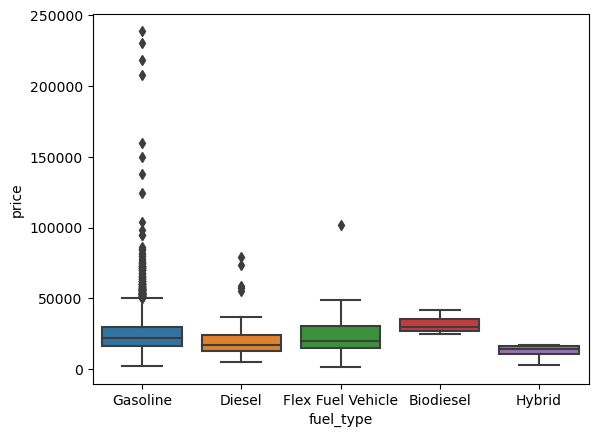

In [168]:
sns.boxplot(data=data, y='price', x='fuel_type')

<AxesSubplot:xlabel='owner_count', ylabel='price'>

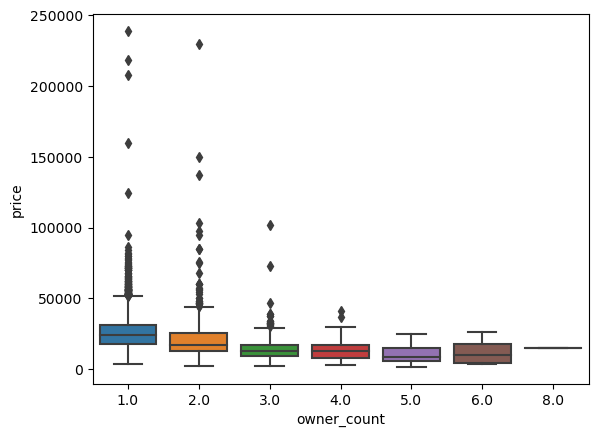

In [162]:
sns.boxplot(data=data, y='price', x='owner_count')

In [163]:
#owner count seems to make a difference

<AxesSubplot:xlabel='has_accidents', ylabel='price'>

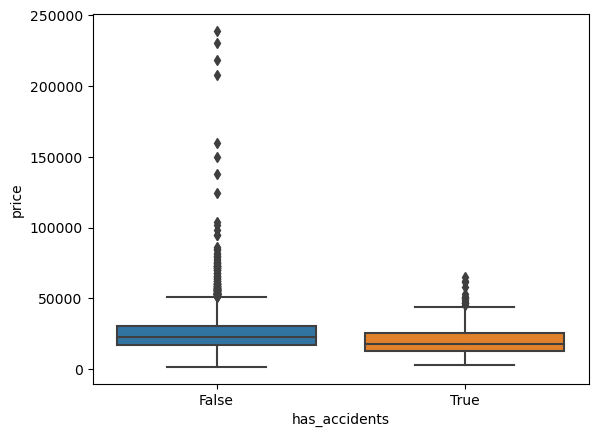

In [156]:
sns.boxplot(data=data, y='price', x='has_accidents')

#### model_name

In [136]:
data.model_name.value_counts().nunique()

71

Looking at both head and tail, there is a good distribution of the different model names, not one that is prelevant wherease the rest only has 1 or 2 entries -> group and turn into numeric

In [57]:
# look at grouped mean
make_mean_price=data.groupby('model_name', as_index=False)['price'].mean()
make_mean_price=make_mean_price.sort_values(by=['price'])
make_mean_price.head()

model_name   price
240                  QX4  2000.0
202       Mariner Hybrid  2953.0
116  Explorer Sport Trac  2995.0
224          Park Avenue  3000.0
124         Five Hundred  3000.0

In [58]:
# like with other column, divide 361 rows into 7 groups, different sizes but around same mean
group_0 = make_mean_price.iloc[0:100,0] # 2000-15000
group_1 = make_mean_price.iloc[100:194,0] # 15000-25000 
group_2 = make_mean_price.iloc[194:237,0] # 25000-30000 
group_3 = make_mean_price.iloc[237:279,0] # 30000-35000
group_4 = make_mean_price.iloc[279:329,0] # 35000-50000
group_5 = make_mean_price.iloc[319:352,0] # 50000-10000
group_6 = make_mean_price.iloc[352:362,0] # rest

# list of names in each group
names_0 = get_names(group_0)
names_1 = get_names(group_1)
names_2 = get_names(group_2)
names_3 = get_names(group_3)
names_4 = get_names(group_4)
names_5 = get_names(group_5)
names_6 = get_names(group_6)

# replace each object with a number of their group
data_2['model_name'] = o_data['model_name'].apply(lambda x: 0 if x in names_0 else
                                                          1 if x in names_1 else
                                                          2 if x in names_2 else
                                                          3 if x in names_3 else
                                                          4 if x in names_4 else
                                                          5 if x in names_5 else
                                                          6 if x in names_6 else
                                                         'wrong')

#### interior_color

In [59]:
data.interior_color.value_counts().head()

Black               1664
None                 723
Jet Black            369
Gray                 286
Black (Charcoal)     261
Name: interior_color, dtype: int64

extremely specific column, almost 700 different unique values where colour was described detailed(5 most common are 3 dif descriptions of black), hard to group and won't be a useful predictor, as this closely described color is very specific, and a interested buyer would probably describe colour differently than written in data -> drop column

In [60]:
data_2 = data_2.drop(columns=["interior_color"], axis = 1)

#### exterior_color

In [61]:
data_2.exterior_color.value_counts().head()

Black           307
White           212
Gray            142
Summit White    139
Silver          126
Name: exterior_color, dtype: int64

Same problem as interior, but over 1000 unique values, extemely specific descriptons, useless, drop

In [62]:
data_2 = data_2.drop(columns=["exterior_color"], axis = 1)

#### Trim: trim_name & trimID

In [139]:
data['trim_name'].nunique()

1159

In [140]:
data['trim_name']

0                 Select FWD
1                    XLT AWD
2                     SE FWD
3             440i Coupe RWD
4            30t R-Sport AWD
                ...         
5995         Black Label AWD
5996                  LT FWD
5997                  SE AWD
5998    Lariat SuperCrew 4WD
5999                 LXS FWD
Name: trim_name, Length: 6000, dtype: object

As the two represent the same thing, we can drop trim_name which is harder to organize

In [63]:
data_2 = data_2.drop(columns=["trim_name"], axis = 1)

In [64]:
data.trimId.head()

0    t66989
1    t67141
2    t55391
3    t73244
4    t83299
Name: trimId, dtype: object

In [65]:
# drop first letter of each row
data_2['trimId'] = data['trimId'].str.slice(1)
# convert to integer
data_2['trimId']=data_2.trimId.astype(int)
# look at correlation
data_2['trimId'].corr(data_2['price'])

0.2991835717273095

Positive correlation between trimID and price visible -> coud be a useful predictor

#### city

In [66]:
data['city'].value_counts().head()

Houston         78
San Antonio     51
Columbus        43
Tampa           32
Indianapolis    31
Name: city, dtype: int64

Has over 1700 unique values, which are distributed relatively evenyl (not one city taking majortiy and the rest 1 or 2), making it hard to analyze initially.

[]

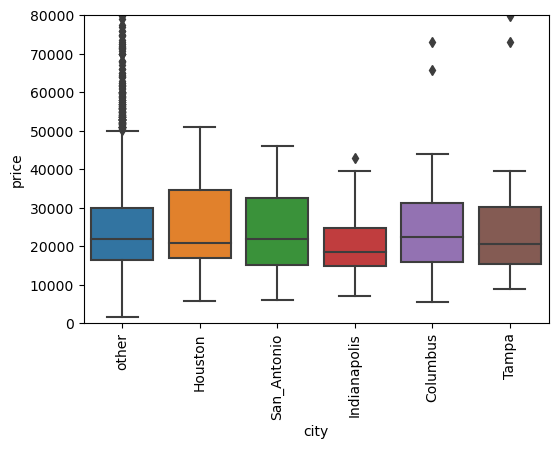

In [67]:
# prelimiary selection of city's that come up more than 20 times for easier visualization
data_2['city'] = o_data['city'].apply(lambda x: 'Houston' if x == 'Houston' else 
                                                          'San_Antonio' if x == 'San Antonio' else
                                                          'Columbus' if x == 'Columbus' else
                                                          'Tampa' if x == 'Tampa' else
                                                          'Indianapolis' if x == 'Indianapolis' else
                                                          'other')
plt.figure(figsize=(6,4))
sns.boxplot(x="city",y="price", data = data_2)
plt.xticks(rotation=90)
plt.ylim(0,80000)
plt.plot()

From this graph, mean of price seems very unrelated of city, even other does not have a big range (just some outliers), does not look like a valuable predictor -> drop column

In [68]:
data_2 = data_2.drop(columns=["city"], axis = 1)

#### major_options

In [69]:
data.major_options.value_counts().head()

['Alloy Wheels', 'Bluetooth', 'Backup Camera']    311
['Steel Wheels', 'Bluetooth', 'Backup Camera']    101
['Alloy Wheels']                                   75
['Alloy Wheels', 'Bluetooth']                      69
['Steel Wheels']                                   66
Name: major_options, dtype: int64

almost 3000 unique values, each packed in list, drop or unpack list but that will make a lot of new columns don't think it's worth the work considering we have a lot of columns

In [169]:
data.major_options

0       ['Leather Seats', 'Alloy Wheels', 'Bluetooth',...
1       ['Leather Seats', 'Sunroof/Moonroof', 'Navigat...
2       ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
3       ['Sport Package', 'Sunroof/Moonroof', 'Navigat...
4       ['Leather Seats', 'Sunroof/Moonroof', 'Navigat...
                              ...                        
5995    ['Sunroof/Moonroof', 'Navigation System', 'Blu...
5996    ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
5997                 ['Backup Camera', 'Parking Sensors']
5998    ['Alloy Wheels', 'Backup Camera', 'Heated Seat...
5999       ['Alloy Wheels', 'Bluetooth', 'Backup Camera']
Name: major_options, Length: 5999, dtype: object

idk if its worth the effort, but we can turn each of the different options into a dummy variable.

In [70]:
data_2 = data_2.drop(columns=["major_options"], axis = 1)

#### sp_name

In [71]:
data.sp_name.value_counts().head()

Honda of Fort Myers                     7
Planet Subaru                           6
Simmons Rockwell Chevrolet Buick GMC    6
Elder Ford of Tampa                     6
ALM Kia South                           6
Name: sp_name, dtype: int64

This information should be represented in franchise_make -> drop the column

In [72]:
data_2 = data_2.drop(columns=["sp_name"], axis = 1)

In [73]:
# drop categorical version of columns we have numerical copy of
data_2 = data_2.drop(columns=["transmission","wheel_system_display","fuel_type","wheel_system"], axis = 1)

In [74]:
data = data_2

In [170]:
data.dtypes

SyntaxError: EOL while scanning string literal (2205454825.py, line 1)

In [76]:
data.shape

(6000, 59)

everything is in numerical form, we still have 6000 rows and now 59 columns

In [77]:
final_corrs = pd.DataFrame(data.corrwith(data.price)).reset_index().sort_values(by = 0, ascending = False)

final_corr_cols = list(final_corrs.loc[(final_corrs[0] >= 0.2) | (final_corrs[0] <= -0.2)][1:]['index'])
final_corrs.loc[(final_corrs[0] >= 0.2) | (final_corrs[0] <= -0.2)][1:]

index         0
22            model_name  0.582557
13            horsepower  0.536780
24                 power  0.517518
31                torque  0.513047
4    engine_displacement  0.359656
9       fuel_tank_volume  0.349802
51   engine_cylinders_V8  0.309665
33             wheelbase  0.303458
32                trimId  0.299184
35                  year  0.292627
7         franchise_make  0.291321
17                length  0.289712
34                 width  0.281954
27        savings_amount  0.260102
11                height  0.211064
38      wheel_system_cat -0.218204
48   engine_cylinders_I4 -0.302891
1      city_fuel_economy -0.316362
21               mileage -0.343969
12  highway_fuel_economy -0.344975

In [78]:
final_dat = data.copy()

for col in final_dat:
    if col not in final_corr_cols:
        final_dat.drop(col, axis = 1, inplace = True)

final_dat.shape

(6000, 20)

We have 20 predictors which have a reasonable correlation with price which we will be the only predictors we use in our model building. 

When we develop our models, we will print the feature importances and note which features are deemed significant by each model. 

In [79]:
# original data had -- for this observation so we can just drop it.
final_dat.isna().sum()
final_dat.iloc[29]
final_dat.drop(29, inplace = True)
y.drop(29, inplace = True)

In [80]:
y.max()

859000.0

In [81]:
# outlier
final_dat.drop(y.idxmax(), inplace = True)
y.drop(y.idxmax(), inplace = True)

In [82]:
y.max()

238888.0

In [83]:
len(y)

5998

In [84]:
X_train, X_test, y_train, y_test = train_test_split(final_dat, y, test_size = 0.3, random_state = 4)

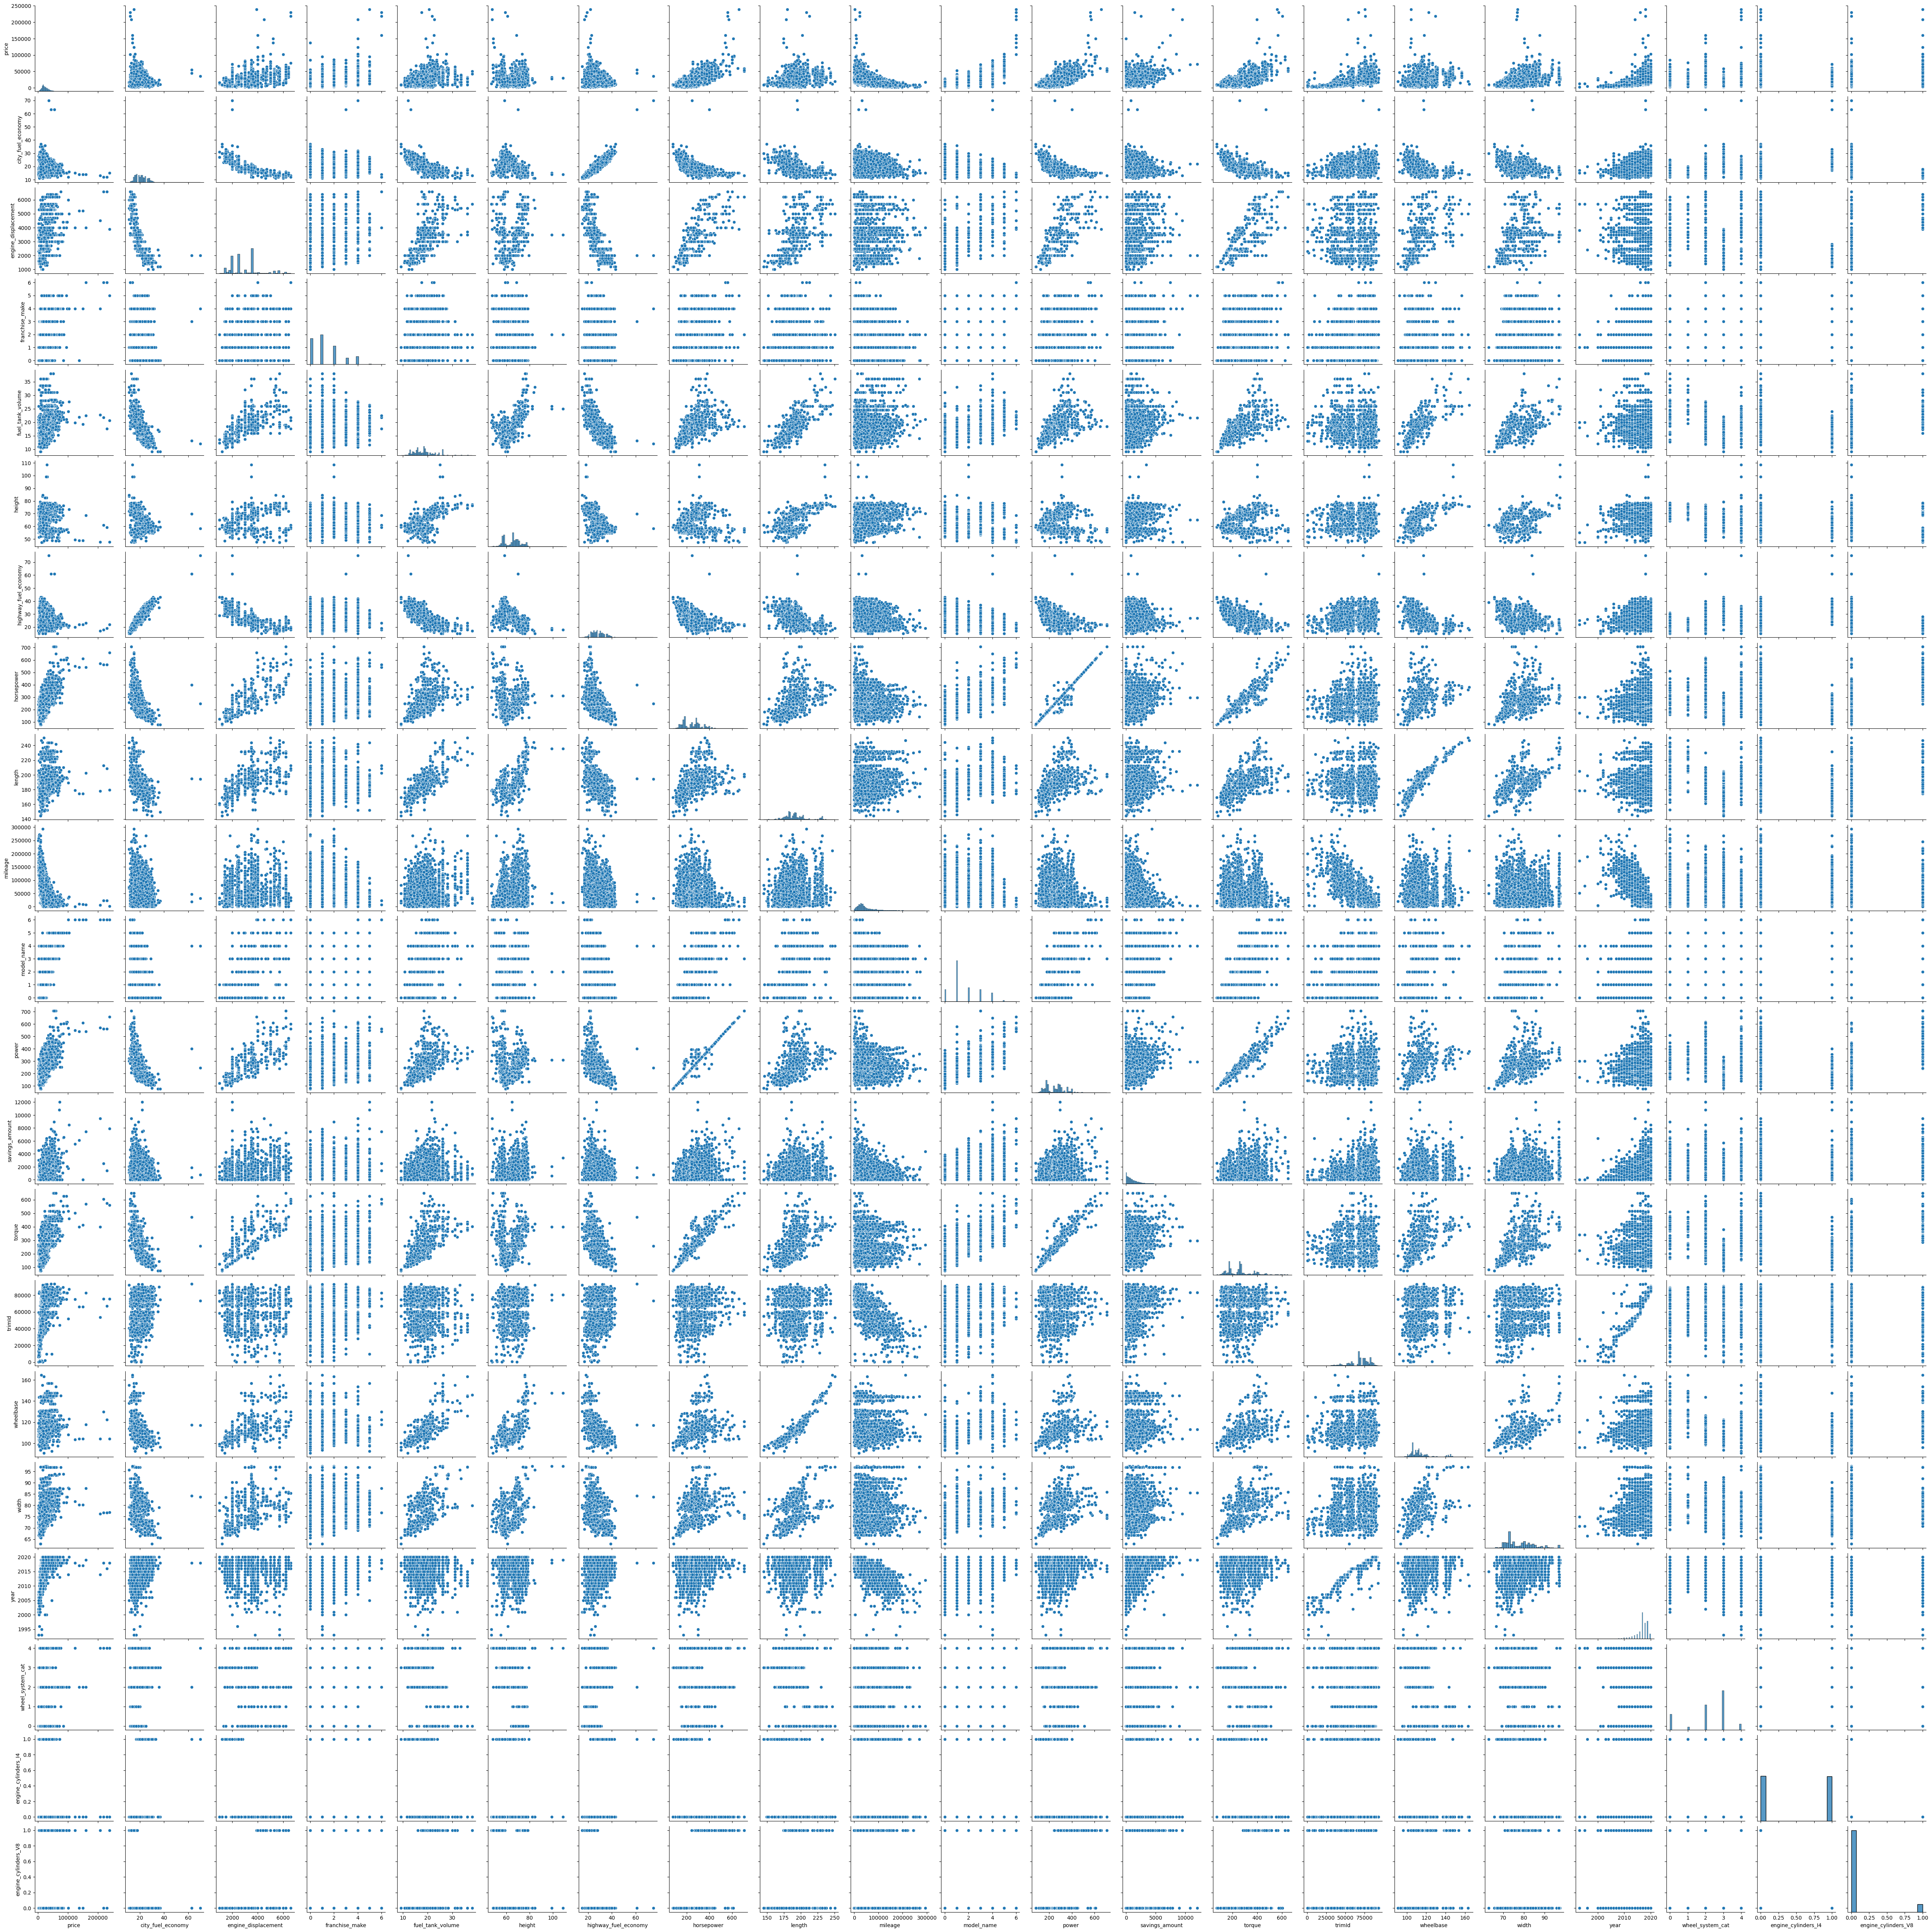

In [85]:
sns.pairplot(pd.concat([y, final_dat], axis=1))

# Please all use the same random_state = 4 in ALL model development so we can be consistent and reproduce results

### and use the same data split as above

# ADA Boost
(Yuyan)


In [86]:
from sklearn.ensemble import AdaBoostRegressor
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

### Before Tuning

In [110]:
# Define the AdaBoost
ab = AdaBoostRegressor(DecisionTreeRegressor(random_state=4),random_state=4)
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores = cross_val_score(ab, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Mean CV RMSE: %.2f ' % -np.mean(n_scores))
print('std on train data:  %.2f ' % np.std(y_train))

Mean CV RMSE: 3786.63 
std on train data:  13228.60 


In [111]:
# Fit the model to the training data
ab.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ab.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R-squared:", r2)

Test RMSE: 3386.8745922064095
Test R-squared: 0.9176060469590147


In [120]:
imp_values = ab.feature_importances_
feature_names = ab.feature_names_in_
pd.DataFrame({'Feature': feature_names, 'Importance': imp_values}).sort_values('Importance', ascending=False)

Feature  Importance
9             model_name    0.791720
8                mileage    0.043671
15                 width    0.033033
17      wheel_system_cat    0.025238
13                trimId    0.025093
6             horsepower    0.019565
12                torque    0.013854
16                  year    0.009849
11        savings_amount    0.008993
5   highway_fuel_economy    0.004541
10                 power    0.003984
7                 length    0.003539
3       fuel_tank_volume    0.003241
1    engine_displacement    0.003063
4                 height    0.003045
2         franchise_make    0.002596
0      city_fuel_economy    0.002467
14             wheelbase    0.002244
19   engine_cylinders_V8    0.000153
18   engine_cylinders_I4    0.000110

In [116]:
sorted_features_list

['model_name',
 'mileage',
 'width',
 'wheel_system_cat',
 'trimId',
 'horsepower',
 'torque',
 'year',
 'savings_amount',
 'highway_fuel_economy',
 'power',
 'length',
 'fuel_tank_volume',
 'engine_displacement',
 'height',
 'franchise_make',
 'city_fuel_economy',
 'wheelbase',
 'engine_cylinders_V8',
 'engine_cylinders_I4']

>0.1 5853.2 (404.6)
>0.2 5843.4 (461.9)
>0.3 5771.3 (442.3)
>0.4 5793.3 (382.3)
>0.5 5970.5 (512.0)
>0.6 6018.1 (332.2)
>0.7 6147.7 (330.6)
>0.8 6160.5 (347.3)
>0.9 6327.7 (418.3)
>1.0 6568.3 (614.8)
>1.1 6265.0 (371.0)
>1.2 6430.9 (425.7)
>1.3 6589.3 (468.6)
>1.4 6426.4 (322.1)
>1.5 6615.3 (547.3)
>1.6 6487.2 (536.3)
>1.7 6445.7 (404.1)
>1.8 6913.9 (478.9)
>1.9 6587.4 (297.3)
>2.0 6683.5 (443.4)


Text(0.5, 0, 'Learning rate')

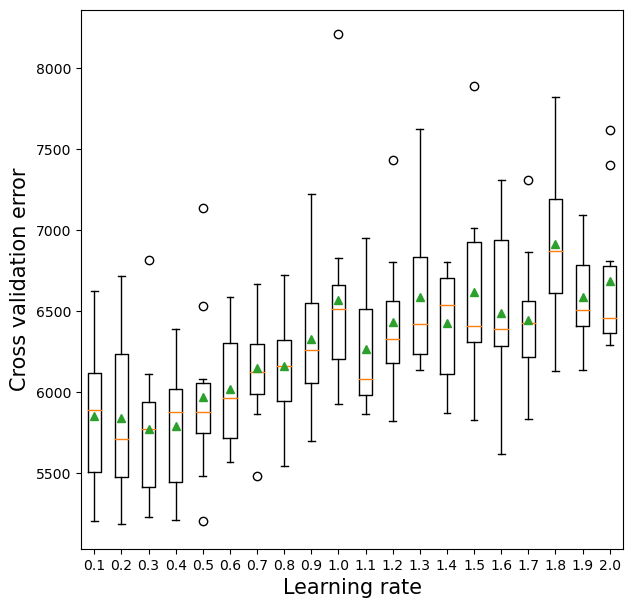

In [89]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.1f' % i
        models[key] = AdaBoostRegressor(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

>1 10757.781 (1010.970)
>2 8250.439 (468.366)
>3 6476.137 (566.073)
>4 5282.160 (409.324)
>5 4787.655 (570.535)
>6 4495.245 (605.804)
>7 4049.296 (406.667)
>8 4009.961 (577.688)
>9 3858.392 (520.823)
>10 3749.264 (528.295)
>11 3610.434 (422.764)
>12 3817.038 (559.878)
>13 3846.821 (542.632)
>14 3689.713 (561.292)
>15 3681.524 (397.797)
>16 3686.102 (528.756)
>17 3836.041 (605.078)
>18 3781.775 (528.639)
>19 3773.385 (510.734)
>20 3854.136 (666.412)


Text(0.5, 0, 'Depth of each tree')

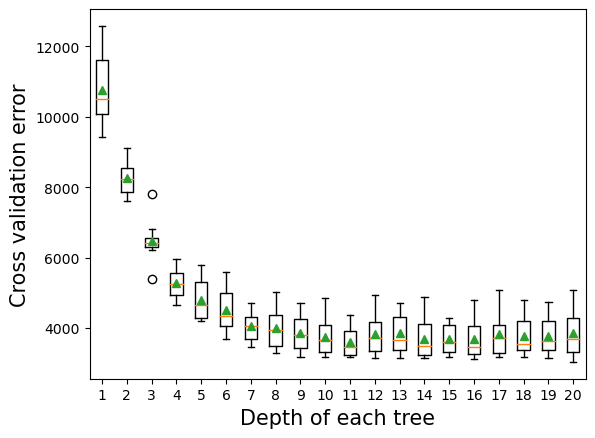

In [91]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,21):
        # define base model
        base = DecisionTreeRegressor(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

### Coarse Grid

In [93]:
ab = AdaBoostRegressor(DecisionTreeRegressor(random_state=4), random_state=4)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [3, 4, 5, 7, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}


# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ab, param_grid, cv=3, scoring = 'neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 1.0, 'n_estimators': 100}
Best score:  -4289.373523380153


In [94]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3856.247613383857


In [ ]:
results_df = pd.DataFrame(grid.cv_results_)[['param_learning_rate', 
                                             'param_n_estimators', 
                                             'mean_test_score']]

In [ ]:
%matplotlib inline

fig, axes = plt.subplots(1,3, sharey=True)
sns.boxplot(x="param_base_estimator__max_depth", y="mean_test_score",
            data=results_df, ax=axes[0])
sns.boxplot(x="param_learning_rate", y="mean_test_score",
            data=results_df, ax=axes[1])
sns.boxplot(x="param_n_estimators", y="mean_test_score",
            data=results_df, ax=axes[2])

In [ ]:
sns.heatmap(results_df[results_df['param_base_estimator__max_depth']==20].pivot(index = "param_learning_rate", 
                       columns = "param_n_estimators", 
                       values ="mean_test_score"))

In [ ]:
y_test.describe()

In [ ]:
y_train.describe()

# trying without model_name

In [123]:
# Define the AdaBoost
ab2 = AdaBoostRegressor(DecisionTreeRegressor(random_state=4),random_state=4)
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores = cross_val_score(ab2, X_train.drop('model_name', axis=1),
                           y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Mean CV RMSE: %.2f ' % -np.mean(n_scores))
print('std on train data:  %.2f ' % np.std(y_train))

Mean CV RMSE: 4525.70 
std on train data:  13228.60 


In [125]:
# Fit the model to the training data
ab2.fit(X_train.drop('model_name', axis=1), y_train)

# Make predictions on the test set
y_pred = ab2.predict(X_test.drop('model_name', axis=1))

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R-squared:", r2)

Test RMSE: 4577.635304390248
Test R-squared: 0.8494851024483063


In [126]:
imp_values = ab2.feature_importances_
feature_names = ab2.feature_names_in_
pd.DataFrame({'Feature': feature_names, 'Importance': imp_values}).sort_values('Importance', ascending=False)

Feature  Importance
6             horsepower    0.291561
9                  power    0.213017
2         franchise_make    0.136224
11                torque    0.089465
8                mileage    0.046848
14                 width    0.046614
10        savings_amount    0.042531
12                trimId    0.031781
13             wheelbase    0.016445
7                 length    0.015066
15                  year    0.013223
4                 height    0.011432
3       fuel_tank_volume    0.011030
1    engine_displacement    0.010905
16      wheel_system_cat    0.010670
5   highway_fuel_economy    0.008552
0      city_fuel_economy    0.004133
18   engine_cylinders_V8    0.000399
17   engine_cylinders_I4    0.000104

# Gradient Boost
(Yuyan)

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
# Define the Gradient Boosting model
gbm = GradientBoostingRegressor(random_state=4)

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R-squared:", r2)

Test RMSE: 3901.1600504449952
Test R-squared: 0.8906837704532153
